In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/covid19-global-forecasting-week-4/train.csv
/kaggle/input/covid19-global-forecasting-week-4/submission.csv
/kaggle/input/covid19-global-forecasting-week-4/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import bokeh 
from bokeh.io import output_notebook
from bokeh.resources import INLINE
import tensorflow as tf
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
output_notebook(resources=INLINE)
%matplotlib inline

Loading BokehJS ...

In [3]:
train = pd.DataFrame(pd.read_csv("/kaggle/input/covid19-global-forecasting-week-4/train.csv"))

In [4]:
print("The shape of training data is = {}".format(train.shape))

The shape of training data is = (28483, 6)


In [5]:
train.Province_State.fillna("", inplace = True)
train.ConfirmedCases.fillna("", inplace = True)
train.Fatalities.fillna("", inplace = True)

In [6]:
train["Country_Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guine

In [7]:
confirmed_cases_us = train[train["Country_Region"] == "US"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_us = train[train["Country_Region"] == "US"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_italy = train[train["Country_Region"] == "Italy"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_italy = train[train["Country_Region"] == "Italy"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_india = train[train["Country_Region"] == "India"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_india = train[train["Country_Region"] == "India"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_france = train[train["Country_Region"] == "France"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_france = train[train["Country_Region"] == "France"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_china = train[train["Country_Region"] == "China"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_china = train[train["Country_Region"] == "China"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_taiwan = train[train["Country_Region"] == "Taiwan*"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_taiwan = train[train["Country_Region"] == "Taiwan*"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_uk = train[train["Country_Region"] == "United Kingdom"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_uk = train[train["Country_Region"] == "United Kingdom"].groupby(["Date"]).Fatalities.sum()

date = train["Date"].unique()

[]

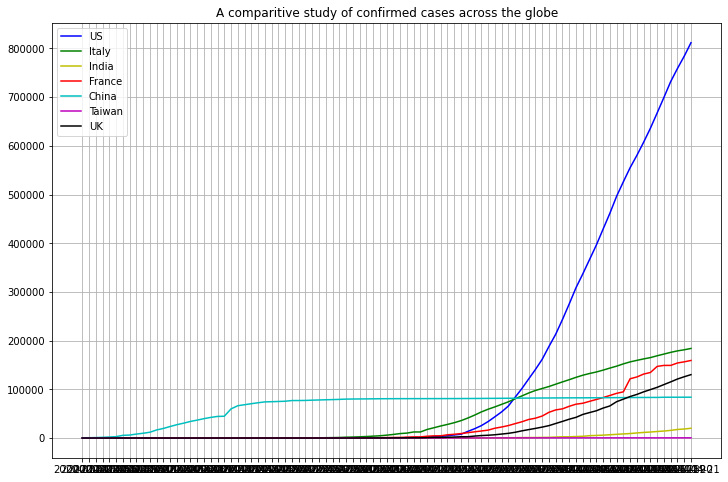

In [8]:
plt.figure(figsize = (12,8))
plt.plot(date, confirmed_cases_us, color = "b", label = "US")
plt.plot(date, confirmed_cases_italy, color = "g", label = "Italy")
plt.plot(date, confirmed_cases_india, color = "y", label = "India")
plt.plot(date, confirmed_cases_france, color = "r", label = "France")
plt.plot(date, confirmed_cases_china, color = "c", label = "China")
plt.plot(date, confirmed_cases_taiwan, color = "m", label = "Taiwan")
plt.plot(date, confirmed_cases_uk , color = "k", label = "UK")
plt.grid("both")
plt.title("A comparitive study of confirmed cases across the globe")
plt.legend()

plt.plot()

[]

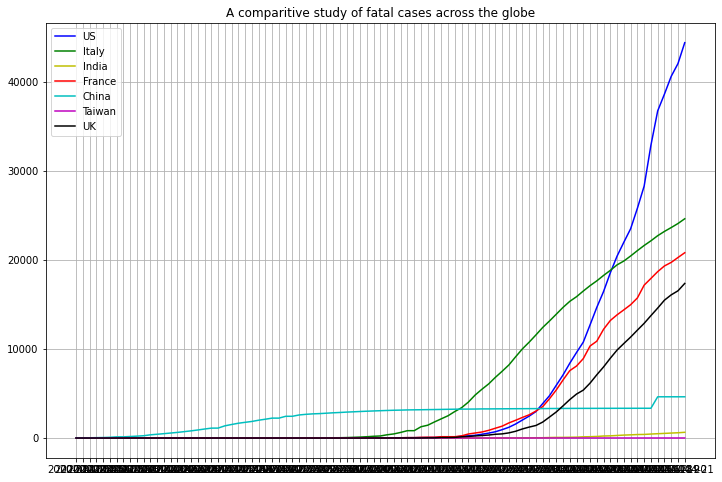

In [9]:
plt.figure(figsize = (12, 8))
plt.plot(date, fatal_cases_us, color = "b", label = "US")
plt.plot(date, fatal_cases_italy, color = "g", label = "Italy")
plt.plot(date, fatal_cases_india, color = "y", label = "India")
plt.plot(date, fatal_cases_france, color = "r", label = "France")
plt.plot(date, fatal_cases_china, color = "c", label = "China")
plt.plot(date, fatal_cases_taiwan, color = "m", label = "Taiwan")
plt.plot(date, fatal_cases_uk , color = "k", label = "UK")
plt.grid("both")
plt.title("A comparitive study of fatal cases across the globe")
plt.legend()

plt.plot()

In [10]:
train["Region"] = train["Country_Region"].astype(str) + train["Province_State"].astype(str)
train.drop(["Country_Region" , "Province_State"], axis = 1, inplace = True)

In [11]:
train.head()

Id        Date  ConfirmedCases  Fatalities       Region
0   1  2020-01-22             0.0         0.0  Afghanistan
1   2  2020-01-23             0.0         0.0  Afghanistan
2   3  2020-01-24             0.0         0.0  Afghanistan
3   4  2020-01-25             0.0         0.0  Afghanistan
4   5  2020-01-26             0.0         0.0  Afghanistan

In [12]:
choro_map = px.choropleth(train, locations = "Region", locationmode = "country names", color = "ConfirmedCases",
                                        hover_name = "Region", animation_frame = "Date")
choro_map.update_layout(title_text = "Global Confirmed Cases", title_x = 0.5, 
                         geo = dict(showframe = False, showcoastlines = True))
choro_map.show()

In [13]:
choro_map = px.choropleth(train, locations = "Region", locationmode = "country names", color = "Fatalities",
                                        hover_name = "Region", animation_frame = "Date")
choro_map.update_layout(title_text = "Fatalities Across The Globe", title_x = 0.5, 
                         geo = dict(showframe = False, showcoastlines = True))
choro_map.show()

In [14]:
df = train

In [15]:
df_cc = df.pivot(index = "Region", columns = "Date", values ="ConfirmedCases")
df_cc.head()

Date         2020-01-22  2020-01-23  2020-01-24  2020-01-25  2020-01-26  \
Region                                                                    
Afghanistan         0.0         0.0         0.0         0.0         0.0   
Albania             0.0         0.0         0.0         0.0         0.0   
Algeria             0.0         0.0         0.0         0.0         0.0   
Andorra             0.0         0.0         0.0         0.0         0.0   
Angola              0.0         0.0         0.0         0.0         0.0   

Date         2020-01-27  2020-01-28  2020-01-29  2020-01-30  2020-01-31  ...  \
Region                                                                   ...   
Afghanistan         0.0         0.0         0.0         0.0         0.0  ...   
Albania             0.0         0.0         0.0         0.0         0.0  ...   
Algeria             0.0         0.0         0.0         0.0         0.0  ...   
Andorra             0.0         0.0         0.0         0.0         0.0  ...   
Angola              0.0         0.0         0.0         0.0         0.0  ...   

Date         2020-04-12  2020-04-13  2020-04-14  2020-04-15  2020-04-16  \
Region                                                                    
Afghanistan       607.0       665.0       714.0       784.0       840.0   
Albania           446.0       467.0       475.0       494.0       518.0   
Algeria          1914.0      1983.0      2070.0      2160.0      2268.0   
Andorra           638.0       646.0       659.0       673.0       673.0   
Angola             19.0        19.0        19.0        19.0        19.0   

Date         2020-04-17  2020-04-18  2020-04-19  2020-04-20  2020-04-21  
Region                                                                   
Afghanistan       906.0       933.0       996.0      1026.0      1092.0  
Albania           539.0       548.0       562.0       584.0       609.0  
Algeria          2418.0      2534.0      2629.0      2718.0      2811.0  
Andorra           696.0       704.0       713.0       717.0       717.0  
Angola             19.0        24.0        24.0        24.0        24.0  

[5 rows x 91 columns]

In [16]:
df_fc = df.pivot(index = "Region" , columns = "Date", values = "Fatalities")
df_fc.head()

Date         2020-01-22  2020-01-23  2020-01-24  2020-01-25  2020-01-26  \
Region                                                                    
Afghanistan         0.0         0.0         0.0         0.0         0.0   
Albania             0.0         0.0         0.0         0.0         0.0   
Algeria             0.0         0.0         0.0         0.0         0.0   
Andorra             0.0         0.0         0.0         0.0         0.0   
Angola              0.0         0.0         0.0         0.0         0.0   

Date         2020-01-27  2020-01-28  2020-01-29  2020-01-30  2020-01-31  ...  \
Region                                                                   ...   
Afghanistan         0.0         0.0         0.0         0.0         0.0  ...   
Albania             0.0         0.0         0.0         0.0         0.0  ...   
Algeria             0.0         0.0         0.0         0.0         0.0  ...   
Andorra             0.0         0.0         0.0         0.0         0.0  ...   
Angola              0.0         0.0         0.0         0.0         0.0  ...   

Date         2020-04-12  2020-04-13  2020-04-14  2020-04-15  2020-04-16  \
Region                                                                    
Afghanistan        18.0        21.0        23.0        25.0        30.0   
Albania            23.0        23.0        24.0        25.0        26.0   
Algeria           293.0       313.0       326.0       336.0       348.0   
Andorra            29.0        29.0        31.0        33.0        33.0   
Angola              2.0         2.0         2.0         2.0         2.0   

Date         2020-04-17  2020-04-18  2020-04-19  2020-04-20  2020-04-21  
Region                                                                   
Afghanistan        30.0        30.0        33.0        36.0        36.0  
Albania            26.0        26.0        26.0        26.0        26.0  
Algeria           364.0       367.0       375.0       384.0       392.0  
Andorra            35.0        35.0        36.0        37.0        37.0  
Angola              2.0         2.0         2.0         2.0         2.0  

[5 rows x 91 columns]

In [17]:
df_cc.to_csv("confirmed_cases.csv", encoding = "utf-8-sig")
df_fc.to_csv("Fatal_cases.csv", encoding = "utf-8-sig")

# Analyzing Confirmed Cases

In [18]:
import IPython
url = "https://preview.flourish.studio/2028487/MSZ6a_Ik9B_0QweCuvJ6rs6D4N51xPsZwqIiymulW2sjdt_iKQcrLXrIG9d7HezS/"
iframe = '<iframe src=' + url + ' width=700 height=350></iframe>'
IPython.display.HTML(iframe)

In [19]:
train.head()

Id        Date  ConfirmedCases  Fatalities       Region
0   1  2020-01-22             0.0         0.0  Afghanistan
1   2  2020-01-23             0.0         0.0  Afghanistan
2   3  2020-01-24             0.0         0.0  Afghanistan
3   4  2020-01-25             0.0         0.0  Afghanistan
4   5  2020-01-26             0.0         0.0  Afghanistan

In [20]:
train["Date"] = pd.to_datetime(train["Date"], format = "%Y-%m-%d")

In [21]:
def extract_from_date(df):
    day = []
    month = []
    for tstamp in df["Date"]:
        t = tstamp.to_pydatetime()
        day.append(t.day)
        month.append(t.month)
    return day, month

In [22]:
day, month = extract_from_date(train)
train["Month"] = month
train["Day"] = day
train.drop(["Date"], axis = 1, inplace = True)

In [23]:
train = train.set_index("Id")

In [24]:
train.head()

ConfirmedCases  Fatalities       Region  Month  Day
Id                                                     
1              0.0         0.0  Afghanistan      1   22
2              0.0         0.0  Afghanistan      1   23
3              0.0         0.0  Afghanistan      1   24
4              0.0         0.0  Afghanistan      1   25
5              0.0         0.0  Afghanistan      1   26

In [25]:
le = LabelEncoder()
train["Encoded_Region"] = le.fit_transform(train["Region"])
train.drop(["Region"], axis = 1, inplace = True)

In [26]:
train["ConfirmedCases"] = train["ConfirmedCases"].astype(int)
train["Fatalities"] = train["Fatalities"].astype(int)

In [27]:
train_size = int(len(train) * 0.9)
val_size = len(train) - train_size
print("Training size = {}".format(train_size))
print("Validation size = {}".format(val_size))

Training size = 25634
Validation size = 2849


In [28]:
train_data = train.iloc[0:train_size]
val_data = train.iloc[train_size : len(train)]

In [29]:
train_x = train_data[["Month", "Day", "Encoded_Region"]]
train_y = train_data[["ConfirmedCases", "Fatalities"]]

val_x = val_data[["Month", "Day", "Encoded_Region"]]
val_y = val_data[["ConfirmedCases", "Fatalities"]]

train_yc = train_y[["ConfirmedCases"]]
train_yf = train_y[["Fatalities"]]
val_yc = val_y[["ConfirmedCases"]]
val_yf = val_y[["Fatalities"]]

In [30]:
print(train_x.shape, val_x.shape)
print(train_yc.shape, train_yf.shape)
print(val_yc.shape, val_yf.shape)

(25634, 3) (2849, 3)
(25634, 1) (25634, 1)
(2849, 1) (2849, 1)


In [31]:
scaler = MinMaxScaler(feature_range = (0,1))
train_x[["Month", "Day"]] = scaler.fit_transform(train_x[["Month", "Day"]])
val_x[["Month", "Day"]] = scaler.fit_transform(val_x[["Month", "Day"]])

In [32]:
def createDataset(x, yc, yf, time_steps):
    xs, ys_c, ys_f = [], [], []
    for i in range(len(x) - time_steps):
        temp_x = x.iloc[i : (i + time_steps)].values
        temp_yc = yc.iloc[i : (i + time_steps)].values
        temp_yf = yf.iloc[i : (i + time_steps)].values
        xs.append(temp_x)
        ys_c.append(temp_yc)
        ys_f.append(temp_yf)
    return np.array(xs), np.array(ys_c), np.array(ys_f)

In [33]:
time_steps = 2
train_x, train_yc, train_yf = createDataset(train_x, train_yc, train_yf, time_steps)
val_x, val_yc, val_yf = createDataset(val_x, val_yc, val_yf, time_steps)
print(train_x.shape, train_yc.shape, train_yf.shape)
print(val_x.shape, val_yc.shape, val_yf.shape)

(25632, 2, 3) (25632, 2, 1) (25632, 2, 1)
(2847, 2, 3) (2847, 2, 1) (2847, 2, 1)


In [34]:
model_cc = tf.keras.Sequential()
model_cc.add(tf.keras.layers.LSTM(units = 128, return_sequences = False, input_shape = (train_x.shape[1], train_x.shape[2])))
model_cc.add(tf.keras.layers.Dense(units = 64, activation = "relu"))
model_cc.add(tf.keras.layers.Dense(units = 32, activation = "relu"))
model_cc.add(tf.keras.layers.Dense(units = 1, activation = "relu"))

In [35]:
model_cc.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.0001), loss = tf.keras.losses.MeanSquaredLogarithmicError())

callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor= "val_loss" , patience = 7, verbose = 1, factor = 0.6, min_lr = 0.0001),
             tf.keras.callbacks.EarlyStopping(monitor = "val_loss" , patience = 7),
             tf.keras.callbacks.ModelCheckpoint(filepath = "best_model.h5", monitor = "val_loss", save_best_only= True)]

In [36]:
with tf.device("/device:GPU:0"):
    history = model_cc.fit(train_x , train_yc, epochs = 300, batch_size = 64, shuffle = False, 
                           validation_data = (val_x , val_yc), verbose = 1)

Train on 25632 samples, validate on 2847 samples
Epoch 1/300
25632/25632 [==============================] - 7s 256us/sample - loss: 12.4483 - val_loss: 8.2194
Epoch 2/300
25632/25632 [==============================] - 2s 67us/sample - loss: 10.2424 - val_loss: 8.0389
Epoch 3/300
25632/25632 [==============================] - 2s 67us/sample - loss: 9.6725 - val_loss: 8.1723
Epoch 4/300
25632/25632 [==============================] - 2s 72us/sample - loss: 9.5251 - val_loss: 8.2644
Epoch 5/300
25632/25632 [==============================] - 2s 69us/sample - loss: 9.4808 - val_loss: 8.3182
Epoch 6/300
25632/25632 [==============================] - 2s 66us/sample - loss: 9.4595 - val_loss: 8.3442
Epoch 7/300
25632/25632 [==============================] - 2s 66us/sample - loss: 9.4443 - val_loss: 8.3393
Epoch 8/300
25632/25632 [==============================] - 2s 65us/sample - loss: 9.4374 - val_loss: 8.3390
Epoch 9/300
25632/25632 [==============================] - 2s 63us/sample - loss: 9.

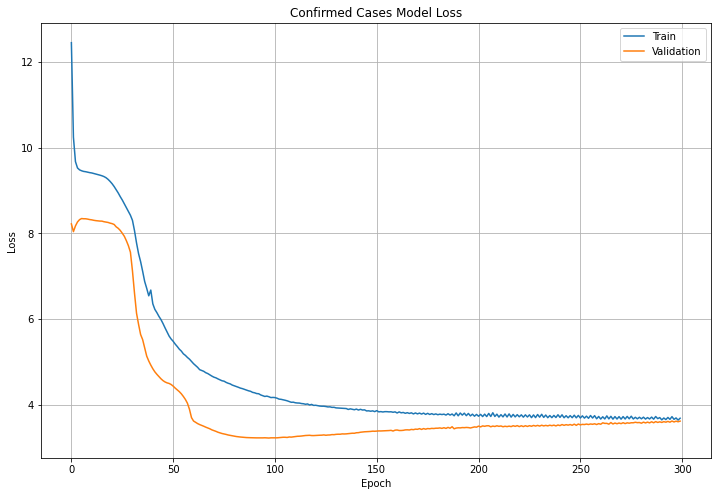

In [37]:
plt.figure(figsize = (12,8))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Confirmed Cases Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train" , "Validation"])
plt.grid("both")
plt.show()

In [38]:
test = pd.DataFrame(pd.read_csv("/kaggle/input/covid19-global-forecasting-week-4/test.csv"))
test.Province_State.fillna("", inplace = True)

test["Region"] = test["Country_Region"].astype(str) + test["Province_State"].astype(str)
test.drop(["Country_Region" , "Province_State"], axis = 1, inplace = True)

test["Date"] = pd.to_datetime(test["Date"], format = "%Y-%m-%d")
day, month = extract_from_date(test)
test["Month"] = month
test["Day"] = day
test.drop(["Date"], axis = 1, inplace = True)

test = test.set_index("ForecastId")

test["Encoded_Region"] = le.fit_transform(test["Region"])
test.drop(["Region"], axis = 1, inplace = True)
test.head()

Month  Day  Encoded_Region
ForecastId                            
1               4    2               0
2               4    3               0
3               4    4               0
4               4    5               0
5               4    6               0

In [39]:
xs = []
time_steps = 2
for i in range(len(test) - time_steps):
    temp_x = test.iloc[i : (i + time_steps)].values
    xs.append(temp_x)
test_x = np.array(xs)

In [40]:
print(test_x)

[[[  4   2   0]
  [  4   3   0]]

 [[  4   3   0]
  [  4   4   0]]

 [[  4   4   0]
  [  4   5   0]]

 ...

 [[  5  10 312]
  [  5  11 312]]

 [[  5  11 312]
  [  5  12 312]]

 [[  5  12 312]
  [  5  13 312]]]


In [41]:
y_pred = model_cc.predict(test_x)

In [42]:
y_pred = pd.DataFrame(y_pred)

In [43]:
y_pred = y_pred.rename(columns = {0 : "Predicted Confirmed Cases"})

In [44]:
test

Month  Day  Encoded_Region
ForecastId                            
1               4    2               0
2               4    3               0
3               4    4               0
4               4    5               0
5               4    6               0
...           ...  ...             ...
13455           5   10             312
13456           5   11             312
13457           5   12             312
13458           5   13             312
13459           5   14             312

[13459 rows x 3 columns]

In [45]:
y_pred.to_csv("Predicted_cases.csv", encoding = "utf-8-sig")